# 4장 분류

In [1]:
# 분류 ML 알고리즘 종류
'''
- 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀
- 데이터 균일도에 따른 규칙 기반의 결정 트리
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 백터 머신
- 근접 거리를 기준으로 하는 최소 근접 알고리즘
- 심픙 연결 기반의 신경망
- 서로 다른 머신러닝 알고리즘을 결합한 앙상블
'''

'\n- 베이즈 통계와 생성 모델에 기반한 나이브 베이즈\n- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀\n- 데이터 균일도에 따른 규칙 기반의 결정 트리\n- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 백터 머신\n- 근접 거리를 기준으로 하는 최소 근접 알고리즘\n- 심픙 연결 기반의 신경망\n- 서로 다른 머신러닝 알고리즘을 결합한 앙상블\n'

## 2. 결정트리

In [2]:
'''
- 정보이득 : 엔트로피 개념  -> 주어진 데이터 집합의 혼잡도 // 서로 다른 값이 섞여 있으면 엔트로피가 높음
            즉, 징보 이득 지수는 1 - 엔트로피 지수 ==> 정보이득 수준이 높은 속성을 기준으로 함
- 지니계수 : 불평등 지수 -> 0이 가장 평등 1이 가장 불평등 
            즉, ML에선 지니계수가 낮을 수록 균일도가 높은 것으로 해석함 -> 지니 계수가 낮은 속성을 기준으로 분할함
'''

'\n- 정보이득 : 엔트로피 개념  -> 주어진 데이터 집합의 혼잡도 // 서로 다른 값이 섞여 있으면 엔트로피가 높음\n            즉, 징보 이득 지수는 1 - 엔트로피 지수 ==> 정보이득 수준이 높은 속성을 기준으로 함\n- 지니계수 : 불평등 지수 -> 0이 가장 평등 1이 가장 불평등 \n            즉, ML에선 지니계수가 낮을 수록 균일도가 높은 것으로 해석함 -> 지니 계수가 낮은 속성을 기준으로 분할함\n'

#### 결정 트리 모델의 시각화

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size = 0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 저장된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file='tree.dot', class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity= True, filled = True)

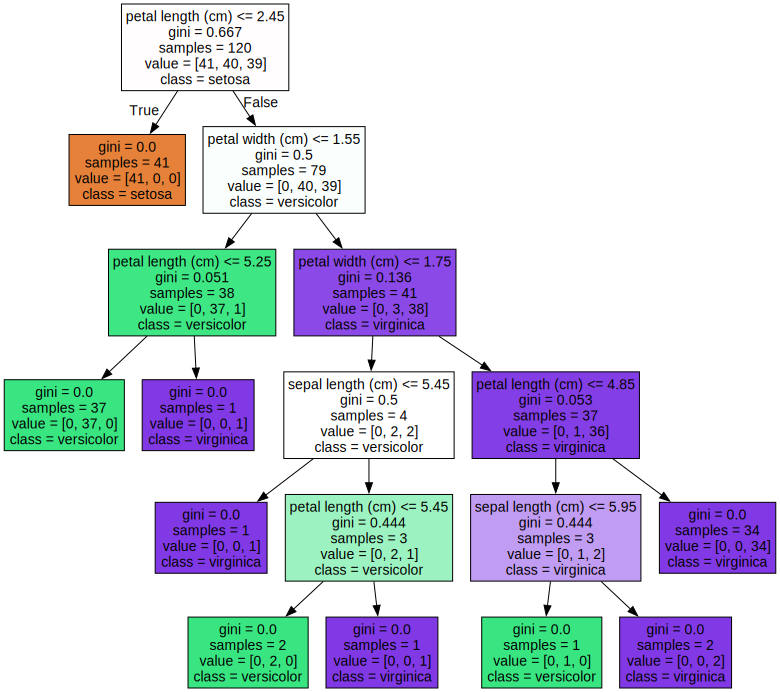

In [5]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


feature importance: [0.025 0.    0.555 0.42 ]
sepal length (cm) 0.025
sepal width (cm) 0.000
petal length (cm) 0.555
petal width (cm) 0.420


<Axes: >

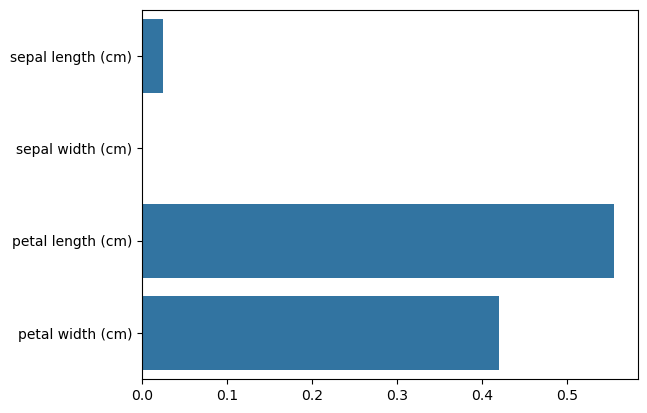

In [6]:
import seaborn as sns
import numpy as np 
%matplotlib inline

# feature importance 추출
print(f'feature importance: {np.round(dt_clf.feature_importances_, 3)}')

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(name, f'{value:.3f}')

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

#### 결정 트리 과적합

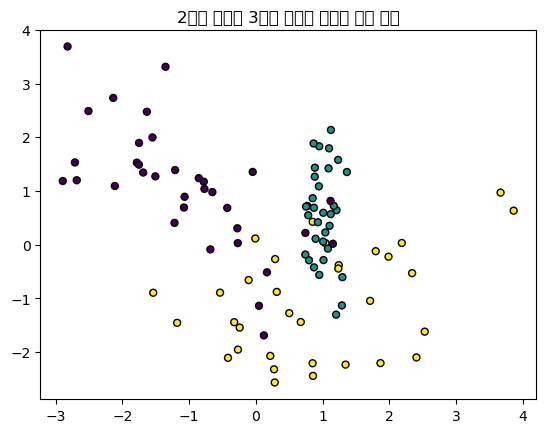

In [7]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('2개의 피처가 3가지 유형의 클래스 값을 가짐')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_feature, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시된
plt.scatter(X_feature[:,0], X_feature[:,1], marker='o', c=y_labels, s=25, edgecolors='k')

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_boundary(model, X, y):
    # X의 두 특성을 기반으로 결정 경계를 시각화
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


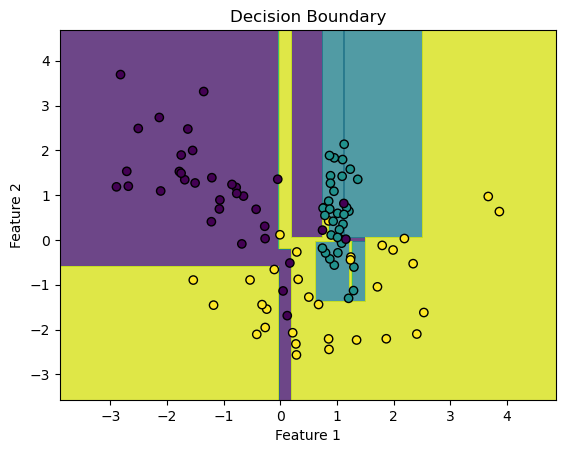

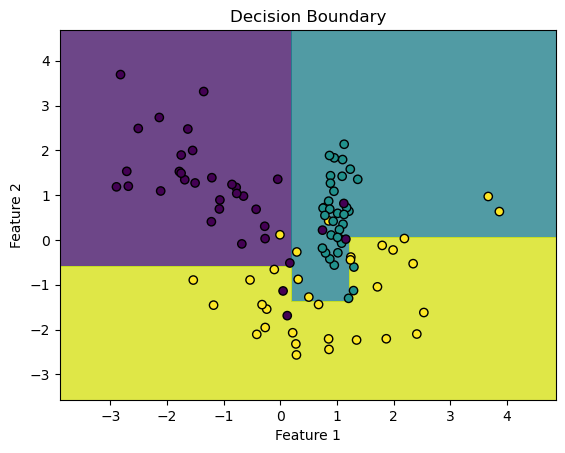

In [9]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_feature,y_labels)
visualize_boundary(dt_clf, X_feature, y_labels)

# min_samples_leaf = 6으로 트리 생성 조건을 제약할 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_feature, y_labels)
visualize_boundary(dt_clf, X_feature, y_labels)

#### 결정 트리 실습 - 사용자 행동 인식 데이터 세트 

In [10]:
import pandas as pd

# feature.txt 파일에는 피터 이름 index의 피처명이 공백으로 분리되어 있음
feature_name_df = pd.read_csv(r'C:\Users\kdp\OneDrive\바탕 화면\09.머신러닝\교과서\human_activity\features.txt',
                              sep = '\s+', header= None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print(f'전체 피처명에서 10개만 추출: {feature_name[:10]}')

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [11]:
feature_drop_df = feature_name_df.groupby('column_name').count()
print(feature_drop_df[feature_drop_df['column_index'] > 1].count())
feature_drop_df[feature_drop_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [12]:
# 42개의 피처명이 중복 -> 원본 피처명에 _1, _2를 추가해 새로운 피처명을 만드는 함수
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read.csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv(r'C:\Users\kdp\OneDrive\바탕 화면\09.머신러닝\교과서\human_activity\features.txt',
                                  sep = '\s+', header= None, names=['column_index', 'column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DF생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DF에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터셋과 테스트 피처 데이터 셋을 DF로 로딩, 칼럼명은 feature_name 적용
    X_train = pd.read_csv(r'C:\Users\kdp\OneDrive\바탕 화면\09.머신러닝\교과서\human_activity\train\X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv(r'C:\Users\kdp\OneDrive\바탕 화면\09.머신러닝\교과서\human_activity\test\X_test.txt', sep='\s+', names=feature_name)
    
    
    # 학습 레이블 데이터셋과 테스트 레이블 데이터 셋을 DF로 로딩, 칼럼명은 action 적용
    y_train = pd.read_csv(r'C:\Users\kdp\OneDrive\바탕 화면\09.머신러닝\교과서\human_activity\train\y_train.txt', sep='\s+', names=['action'])
    y_test = pd.read_csv(r'C:\Users\kdp\OneDrive\바탕 화면\09.머신러닝\교과서\human_activity\test\y_test.txt', sep='\s+', names=['action'])

    # 로드된 학습/테스트용 DF을 모두 변환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()


In [13]:
# 학습 피처 데이터 셋 정보
print(X_train.info())
print(X_train.head(1))
print(y_train['action'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
0         -0.923527         -0.934724  ...                        -0.074323   

   fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
0                        -0.298676                        -0.710304   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                                0.0304   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyr

In [14]:
# 동작 예측 분류
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuary = accuracy_score(y_test, pred)
print(f'결정 트리 예측 정확도: {accuary:.4f}')

# DecisionTreeClassifier의 하이퍼 파리미터 추출
print(f'DecisionTreeClassifier 기본 하이퍼 파라미터', dt_clf.get_params())

결정 트리 예측 정확도: 0.8544
DecisionTreeClassifier 기본 하이퍼 파라미터 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:', grid_cv.best_score_)
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

# GridSearchCV 객체의 cv_result_를 DF로 생성
cv_result_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_result_df[['param_max_depth', 'mean_test_score']]

Fitting 5 folds for each of 7 candidates, totalling 35 fits


KeyboardInterrupt: 

In [ ]:
max_depths = [6,8,10,12,16,20,24]

# max_depth 값을 변화시키면서 그떄마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split= 16, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f'max_depth = {depth}, 정확도 : {accuracy:.4f}')

max_depth = 6, 정확도 : 0.8551
max_depth = 8, 정확도 : 0.8717
max_depth = 10, 정확도 : 0.8599
max_depth = 12, 정확도 : 0.8571
max_depth = 16, 정확도 : 0.8599
max_depth = 20, 정확도 : 0.8565
max_depth = 24, 정확도 : 0.8565


In [ ]:
params = {
    'max_depth' : [8,10,12,16,20],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:', grid_cv.best_score_)
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV 최고 평균 정확도 수치: 0.8548794147162603
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print(f'결정 트리 예측 정확도 : {accuracy:.4f}')

결정 트리 예측 정확도 : 0.8717


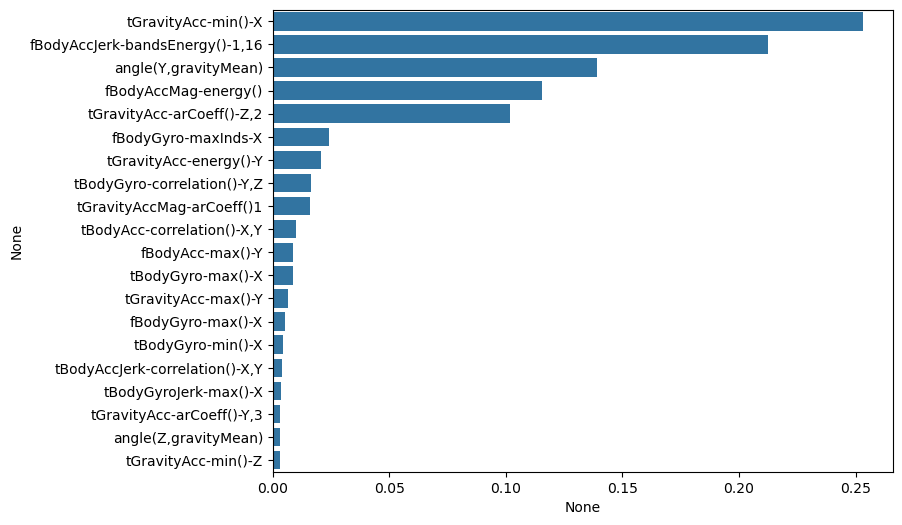

In [ ]:
import seaborn as sns

fit_importances_values = best_df_clf.feature_importances_

# TOP 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series 변환
fit_importances = pd.Series(fit_importances_values, index=X_train.columns)

# 중요도 값 순으로 정렬
fit_top20 = fit_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
sns.barplot(x=fit_top20, y=fit_top20.index)
plt.show()

## 3. 앙상블 학습

#### 보팅 분류기

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

# 개별 모델은 로지스틱회귀와 KNN
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 :', accuracy_score(y_test, pred))

# 개별 보델의 학습//예측/평가
classfiters = [lr_clf, knn_clf]
for classfiter in classfiters:
    classfiter.fit(X_train, y_train)
    pred = classfiter.predict(X_test)
    class_name = classfiter.__class__.__name__
    print(f'{class_name} 정확도: {accuracy_score(y_test, pred)}')

Voting 분류기 정확도 : 0.956140350877193
LogisticRegression 정확도: 0.9473684210526315
KNeighborsClassifier 정확도: 0.9385964912280702


## 4. 랜덤 포레스트

#### 랜덤 포레스트의 개요 및 실습

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포세스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuary = accuracy_score(y_test, pred)
print(f'랜덤 포레스트 정확도: {accuracy:.4f}')

랜덤 포레스트 정확도: 0.8717


#### 랜덤포레스트 하이퍼 파라미터 및 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8,16,24],
    'min_samples_leaf' : [1,6,12],
    'min_samples_split' : [2,8,16]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼파라미터 : ',grid_cv.best_params_ )
print('최고 예측 정확도 : ', grid_cv.best_score_)

최적 하이퍼파라미터 :  {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도 :  0.9164853101196953


In [ ]:
# 추출된 하이퍼 파라미터로 학습 시키기
rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)
rf_clf1 .fit(X_train, y_train)
pred = rf_clf1.predict(X_test)

print('예측 정확도 : ', accuracy_score(y_test, pred))

예측 정확도 :  0.9260264675941635


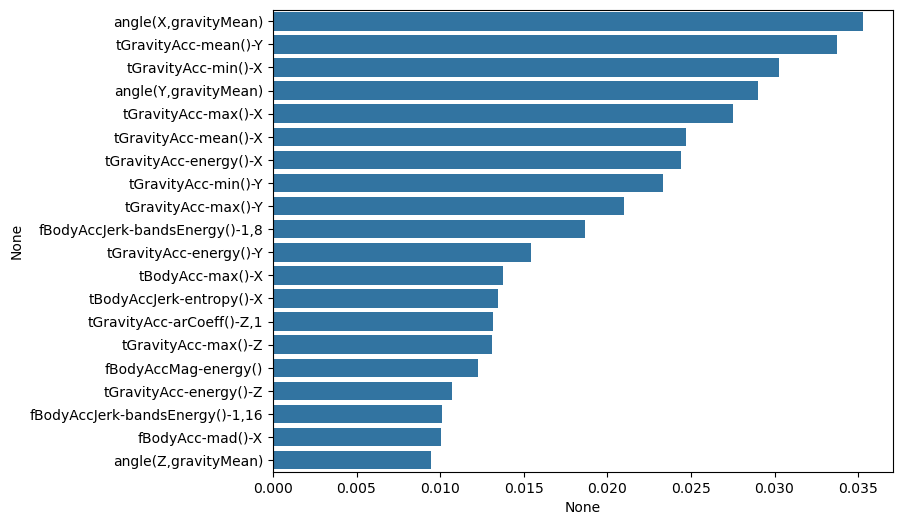

In [ ]:
ftr_importance_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importance_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 5. GBM(Gradient Boosting Machine)

#### GBM의 개요 및 실습

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(f'GBM 정확도: {gb_accuracy:.4f}')


GBM 정확도: 0.9389


## 6. XGBoost(Gradient Boosting Machine)

#### 파이썬 레퍼 XGBoost 적용

In [1]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
feature = dataset.data
labels = dataset.target
cancer_df = pd.DataFrame(data=feature, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [2]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [3]:
# cancer_df에서 feature용 DF과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. feature용 DF은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 컬럼까지를 :-1 슬라이싱으로 추출

X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90% 학습, 10% 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)


(455, 30) (114, 30)
(409, 30) (46, 30)


In [4]:
# # xgboost가 구버전이므로 넘파이 배열 변환
# X_train = X_train.values
# X_test = X_test.values
# X_val = X_val.values
# y_train = y_train.values
# y_val = y_val.values
# y_test =y_test.values


# 학습/검증/테스트용 Dmetrix를 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [5]:
# 하이퍼 파라미터 설정 : dict 형태
params = {
    'max_depth':3,
    'eta': 0.05,
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss'
}
num_rounds = 400

# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기합니다.
eval_list = [(dtr, 'train'),(dval,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, early_stopping_rounds=50, evals=eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52929
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31893	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

In [6]:
pred_prods = xgb_model.predict(dtest)
print('pred_prods() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_prods[:10], 3))

# 얘측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_prods]
print('예측값 10개', preds[:10])

pred_prods() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개 [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [8]:
from sklearn.metrics import (confusion_matrix, accuracy_score, 
                             precision_score, recall_score, 
                             f1_score, roc_auc_score)


def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {roc_auc:.4f}')

In [9]:
get_clf_eval(y_test, preds, pred_prods)

오차행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC: 0.9937


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

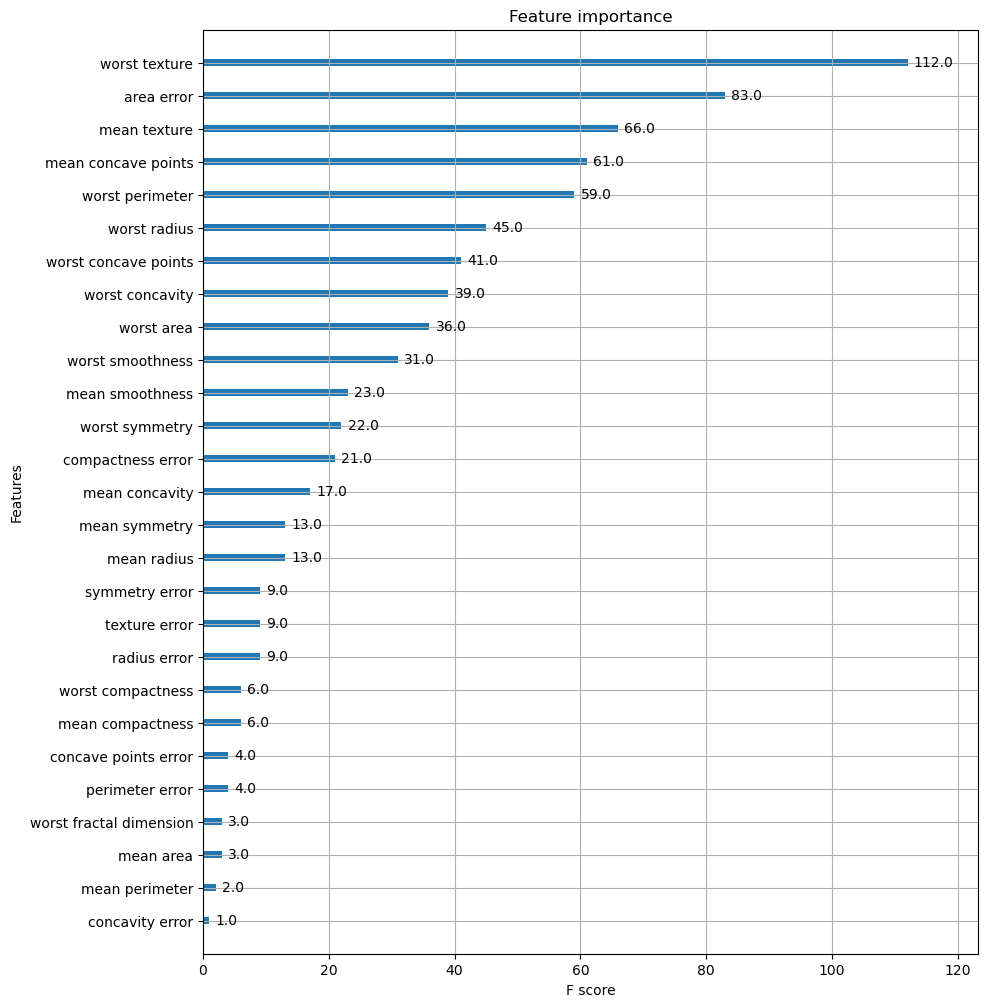

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# 시각화
fig, ax =plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

#### 사이킷런 레퍼 XGBoost 적용

In [15]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier
from xgboost import XGBClassifier

# Waring 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.05, max_depths=3, eval_metric = 'logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proda = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_preds, w_pred_proda)

[13:34:12] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "max_depths" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


오차행렬
[[34  3]
 [ 3 74]]
정확도: 0.9474, 정밀도: 0.9610, 재현율: 0.9610, F1: 0.9610, AUC: 0.9940


In [17]:
xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.05, max_depths=3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr,y_tr,early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

[17:56:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "max_depths" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.64995	validation_1-logloss:0.66107
[1]	validation_0-logloss:0.61090	validation_1-logloss:0.63423
[2]	validation_0-logloss:0.57446	validation_1-logloss:0.61012
[3]	validation_0-logloss:0.54177	validation_1-logloss:0.58792
[4]	validation_0-logloss:0.51097	validation_1-logloss:0.56746
[5]	validation_0-logloss:0.48299	validation_1-logloss:0.55053
[6]	validation_0-logloss:0.45605	validation_1-logloss:0.52901
[7]	validation_0-logloss:0.43210	validation_1-logloss:0.51510
[8]	validation_0-logloss:0.40887	validation_1-logloss:0.49657
[9]	validation_0-logloss:0.38729	validation_

In [ ]:
# early_stopping_rounds를 10으로 설정하고 재학습

xgb_wrapper.fit(X_tr,y_tr,early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[18:01:49] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "max_depths" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.64995	validation_1-logloss:0.66107
[1]	validation_0-logloss:0.61090	validation_1-logloss:0.63423
[2]	validation_0-logloss:0.57446	validation_1-logloss:0.61012
[3]	validation_0-logloss:0.54177	validation_1-logloss:0.58792
[4]	validation_0-logloss:0.51097	validation_1-logloss:0.56746
[5]	validation_0-logloss:0.48299	validation_1-logloss:0.55053
[6]	validation_0-logloss:0.45605	validation_1-logloss:0.52901
[7]	validation_0-logloss:0.43210	validation_1-logloss:0.51510
[8]	validation_0-logloss:0.40887	validation_1-logloss:0.49657
[9]	validation_0-logloss:0.38729	validation_

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

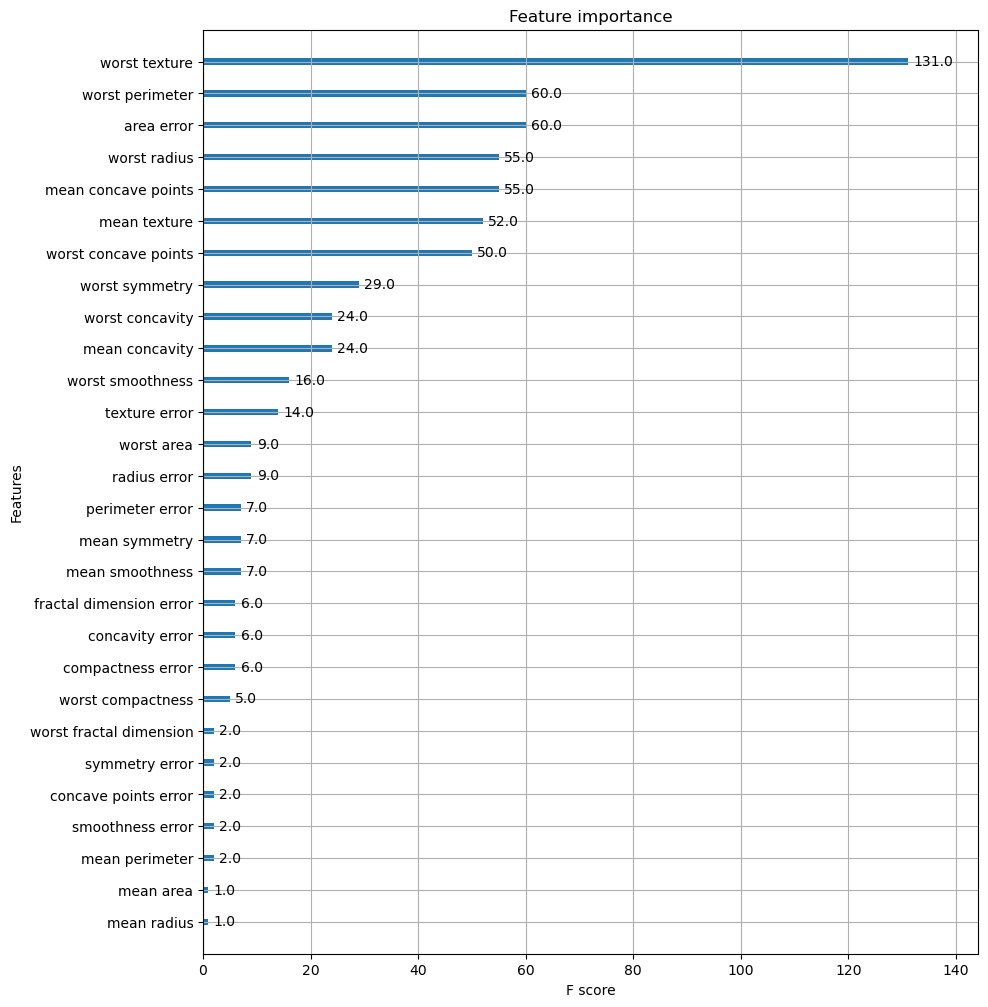

In [20]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
# 사이킷런 래퍼 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)

## 7. LightGBM

In [22]:
# %pip install lightgbm==3.3.2
import lightgbm
from lightgbm import LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset, columns=dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_feature, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90% 는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

# 앞서 XCBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM와 XGBoost와 동일하게 조기 중단 수행 가능
